### 1. Umieszczenie danych w Digital Ocean Spaces


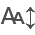

In [45]:
# lepsza wizualizacja DataFrame

from itables import init_notebook_mode

init_notebook_mode(all_interactive=True)

In [46]:
# praca z Cloud Storage

from dotenv import load_dotenv
import boto3
import os

load_dotenv()

s3 = boto3.client(
    "s3",
    #aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    #aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
    #endpoint_url=os.getenv("AWS_ENDPOINT_URL_S3")
)

In [47]:
BUCKET_NAME = "halfmarathon"

In [5]:
# wysyłanie plików do Cloud Storage

s3.upload_file(
    Filename='halfmarathon_wroclaw_2023__final.csv',
    Bucket=BUCKET_NAME,
    Key='stocks/year=2023/halfmarathon_wroclaw_2023__final.csv'
)

s3.upload_file(
    Filename='halfmarathon_wroclaw_2024__final.csv',
    Bucket=BUCKET_NAME,
    Key='stocks/year=2024/halfmarathon_wroclaw_2024__final.csv'
)

### 2.1. Wczytanie danych z Digital Ocean Spaces do DataFrame

In [48]:
import pandas as pd

df = pd.read_csv(f's3://{BUCKET_NAME}/stocks/year=2024/halfmarathon_wroclaw_2024__final.csv', sep=';')
df.head()

Miejsce  Numer startowy     Imię    Nazwisko   Miasto Kraj  \
0      1.0             596  NIKODEM    DWORCZAK  KOŚCIAN  POL   
1      2.0             616  MATEUSZ      KACZOR    RADOM  POL   
2      3.0             154   PATRYK   KOZŁOWSKI    RADOM  POL   
3      4.0             591  DARIUSZ  BORATYŃSKI  WROCŁAW  POL   
4      5.0             521   SZYMON  DOROŻYŃSKI    LUBON  POL   

                               Drużyna Płeć  Płeć Miejsce Kategoria wiekowa  \
0                                  NaN    M           1.0               M20   
1                    RLTL OPTIMA RADOM    M           2.0               M20   
2                       RLTL-ZTE-RADOM    M           3.0               M20   
3          WOSIEK TEAM AZS AWF WROCŁAW    M           4.0               M20   
4  SZYMI TEAM AZS POLITECHNIKA OPOLSKA    M           5.0               M30   

   ...  10 km Tempo  15 km Czas 15 km Miejsce Open  15 km Tempo  20 km Czas  \
0  ...     2.920000    00:45:07                2.0     3.083333    01:00:33   
1  ...     2.920000    00:45:07                3.0     3.083333    01:00:38   
2  ...     2.920000    00:45:07                1.0     3.083333    01:00:59   
3  ...     3.110000    00:47:48                4.0     3.293333    01:05:40   
4  ...     3.153333    00:48:09                5.0     3.453333    01:06:05   

  20 km Miejsce Open  20 km Tempo  Tempo Stabilność      Czas     Tempo  
0                1.0     3.086667          0.007267  01:04:03  3.036265  
1                2.0     3.103333          0.008267  01:04:24  3.052856  
2                3.0     3.173333          0.012467  01:04:40  3.065497  
3                4.0     3.573333          0.028667  01:09:44  3.305681  
4                5.0     3.586667          0.039800  01:10:05  3.322272  

[5 rows x 27 columns]

### 2.2. Czyszczenie danych

In [49]:
# Snippet pomocniczy - zmiana czasu na sekundy

def convert_time_to_seconds(time):
    if pd.isnull(time) or time in ['DNS', 'DNF']: #DID NOT START / DID NOT FINISH
        return None
    time = time.split(':')
    return int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])

In [50]:
df['Czas'] = df['Czas'].apply(convert_time_to_seconds)
df['5 km Czas'] = df['5 km Czas'].apply(convert_time_to_seconds)
df['10 km Czas'] = df['10 km Czas'].apply(convert_time_to_seconds)
df['15 km Czas'] = df['15 km Czas'].apply(convert_time_to_seconds)
df['20 km Czas'] = df['20 km Czas'].apply(convert_time_to_seconds)

In [51]:
# zostawiam tylko potrzebne kolumny

df = df[['Płeć', 'Rocznik', '5 km Czas', '5 km Tempo', '10 km Czas', '10 km Tempo',
        '15 km Czas', '15 km Tempo', '20 km Czas', '20 km Tempo', 'Czas', 'Tempo']].copy()

In [52]:
# zmieniam nazewnictwo

df = df.rename(columns = {
    '5 km Czas' : '5km Czas [sek]', 
    '10 km Czas' : '10km Czas [sek]', 
    '15 km Czas' : '15km Czas [sek]', 
    '20 km Czas' : '20km Czas [sek]',
    '5 km Tempo' : '5km Tempo [min/km]',
    '10 km Tempo' : '10km Tempo [min/km]',
    '15 km Tempo' : '15km Tempo [min/km]',
    '20 km Tempo' : '20km Tempo [min/km]',
    'Tempo' : 'Tempo [min/km]',
    'Czas' : 'Czas [sek]'})

In [53]:
# zmieniam kolumne rocznik na kolumne wiek

df['Wiek'] = 2024 - df['Rocznik']
df = df.drop(columns=['Rocznik'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13007 entries, 0 to 13006
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Płeć                 12998 non-null  object 
 1   5km Czas [sek]       10288 non-null  float64
 2   5km Tempo [min/km]   10288 non-null  float64
 3   10km Czas [sek]      10288 non-null  float64
 4   10km Tempo [min/km]  10279 non-null  float64
 5   15km Czas [sek]      10287 non-null  float64
 6   15km Tempo [min/km]  10277 non-null  float64
 7   20km Czas [sek]      10295 non-null  float64
 8   20km Tempo [min/km]  10285 non-null  float64
 9   Czas [sek]           10300 non-null  float64
 10  Tempo [min/km]       10300 non-null  float64
 11  Wiek                 12723 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.2+ MB


In [56]:
# sprawdzam wartości brakujace w ujęciu procentowym

df.isnull().sum() / len(df)

Płeć                   0.000692
5km Czas [sek]         0.209041
5km Tempo [min/km]     0.209041
10km Czas [sek]        0.209041
10km Tempo [min/km]    0.209733
15km Czas [sek]        0.209118
15km Tempo [min/km]    0.209887
20km Czas [sek]        0.208503
20km Tempo [min/km]    0.209272
Czas [sek]             0.208119
Tempo [min/km]         0.208119
Wiek                   0.021834
dtype: float64

In [57]:
len(df.dropna(subset=['Wiek', 'Płeć', 'Czas [sek]'])) / len(df) * 100

77.00468978242485

In [58]:
# widzę, że brakuje wszystkich pomiarów

df[df['Czas [sek]'].isna()].sample(5)

Płeć  5km Czas [sek]  5km Tempo [min/km]  10km Czas [sek]  \
11206    M             NaN                 NaN              NaN   
11407    M             NaN                 NaN              NaN   
12285    M             NaN                 NaN              NaN   
11488    K             NaN                 NaN              NaN   
12871    M             NaN                 NaN              NaN   

       10km Tempo [min/km]  15km Czas [sek]  15km Tempo [min/km]  \
11206                  NaN              NaN                  NaN   
11407                  NaN              NaN                  NaN   
12285                  NaN              NaN                  NaN   
11488                  NaN              NaN                  NaN   
12871                  NaN              NaN                  NaN   

       20km Czas [sek]  20km Tempo [min/km]  Czas [sek]  Tempo [min/km]  Wiek  
11206              NaN                  NaN         NaN             NaN  35.0  
11407              NaN                  NaN         NaN             NaN  33.0  
12285              NaN                  NaN         NaN             NaN  33.0  
11488              NaN                  NaN         NaN             NaN  32.0  
12871              NaN                  NaN         NaN             NaN  63.0

In [59]:
# usuwam NaN z kolumn wiek, płeć bowiem to tylko nieco ponad 2% danych, ktore nie maja takiego wplywu
# dodatkowo usuwam ponad 20% danych z kolumny Czas, bowiem Ci zawodnicy nie zostali zmierzeni

df.dropna(subset=['Wiek', 'Płeć', 'Czas [sek]'], inplace=True)

In [60]:
df.isna().sum()

# najwazniejsze, ze nie ma NaN w kolumnie target= 'Czas [sek]'
# z reszta poradzi sobie PyCaret

Płeć                    0
5km Czas [sek]         12
5km Tempo [min/km]     12
10km Czas [sek]        11
10km Tempo [min/km]    20
15km Czas [sek]        12
15km Tempo [min/km]    21
20km Czas [sek]         5
20km Tempo [min/km]    14
Czas [sek]              0
Tempo [min/km]          0
Wiek                    0
dtype: int64

In [61]:
#sprawdzam przykładowe wartości odstajace

df[['Wiek', 'Czas [sek]', 'Tempo [min/km]']].plot(kind='box');

In [62]:
#usuwam wszystkie wartości odstajace z kolumn 'Czas', 'Tempo' oraz 'Wiek'

columns_with_outliers = [
    'Wiek', 'Tempo [min/km]', '5km Czas [sek]', '10km Czas [sek]', '15km Czas [sek]', '20km Czas [sek]', 'Czas [sek]',
    '5km Tempo [min/km]', '10km Tempo [min/km]', '15km Tempo [min/km]', '20km Tempo [min/km]'
]

clear_df = df.copy()

for column in columns_with_outliers:
    Q1 = clear_df[column].quantile(0.25)
    Q3 = clear_df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    clear_df = clear_df[~((clear_df[column] < lower_bound) | (clear_df[column] > upper_bound))]

clear_df[['Wiek', 'Czas [sek]', 'Tempo [min/km]']].plot(kind='box');

### 2.3. Trenowanie modelu

In [63]:
# importuję biblioteki dla modelu regresji (model -> value)

from pycaret.regression import setup, compare_models, finalize_model, plot_model, save_model, predict_model

In [71]:
# tworzę eksperyment
# po kilku próbach odtworzeń eksperymentu zdecydowałem zignorować kolumny z tempem, gdyż jest to wynikowa czasu
# dodatkowo pozostawiłem jedynie czas na 5 i 10km, gdyż sa to typowe dystansy startowe (pomimo duzo wiekszego MAE!)
# + dodałem w v2: tempo na 15km żeby zmniejszyć MAE

exp = setup(
    data=clear_df, 
    target='Czas [sek]',
    ignore_features=['Tempo [min/km]', '5km Tempo [min/km]', '10km Tempo [min/km]', 
                     '20km Tempo [min/km]','15km Czas [sek]', '20km Czas [sek]'],
    session_id=123)

Description,Value
Session id,123
Target,Czas [sek]
Target type,Regression
Original data shape,"(9554, 12)"
Transformed data shape,"(9554, 6)"
Transformed train set shape,"(6687, 6)"
Transformed test set shape,"(2867, 6)"
Ignore features,6
Numeric features,4
Categorical features,1


In [72]:
# szukam najlepszego modelu pod katem metryki MAE - średni bład bezw.

best_model = exp.compare_models(sort='MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,78.7689,14552.6933,119.9712,0.9873,0.0156,0.0105,0.1840
br,Bayesian Ridge,78.7716,14552.6874,119.9710,0.9873,0.0156,0.0105,0.0780
ridge,Ridge Regression,78.7949,14552.9929,119.9704,0.9873,0.0156,0.0105,0.0800
lasso,Lasso Regression,78.9510,14575.6010,120.0553,0.9873,0.0157,0.0105,0.1560
llar,Lasso Least Angle Regression,78.9511,14575.7035,120.0556,0.9873,0.0157,0.0105,0.0860
lar,Least Angle Regression,79.1165,15025.0174,122.0055,0.9869,0.0158,0.0105,0.1010
lightgbm,Light Gradient Boosting Machine,79.6247,14359.2411,119.3001,0.9875,0.0156,0.0106,0.5580
huber,Huber Regressor,83.3766,15676.1121,124.6078,0.9864,0.0163,0.0111,0.2810
en,Elastic Net,149.1605,45253.9670,212.2036,0.9607,0.0279,0.0199,0.0960
knn,K Neighbors Regressor,172.3233,56894.9785,238.3581,0.9507,0.0313,0.0230,0.0560


In [75]:
# próba strojenia hiperparametrów

best_tuned_model = exp.tune_model(best_model, n_iter=200, optimize='MAE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,78.3656,12967.8820,113.8766,0.9893,0.0147,0.0105
1,73.2644,10805.3990,103.9490,0.9913,0.0135,0.0097
2,74.2482,12164.9272,110.2947,0.9891,0.0144,0.0099
3,75.5647,13983.3737,118.2513,0.9878,0.0153,0.0100
4,78.5465,14506.2915,120.4421,0.9872,0.0155,0.0104
5,83.1156,18237.1329,135.0449,0.9836,0.0170,0.0110
6,78.6397,12678.2960,112.5979,0.9897,0.0147,0.0104
7,86.1665,22120.5840,148.7299,0.9805,0.0202,0.0116
8,77.4949,12437.9261,111.5255,0.9896,0.0145,0.0104


Fitting 10 folds for each of 2 candidates, totalling 20 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [76]:
# strojenie hiperparametrow nie przynioslo rezultatow

best_final_model = compare_models([best_model, best_tuned_model])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
0,Linear Regression,78.7689,14552.6933,119.9712,0.9873,0.0156,0.0105,0.0700
1,Linear Regression,78.7689,14552.6933,119.9712,0.9873,0.0156,0.0105,0.0510


In [77]:
# sprawdzam best model na Holdout Dataset - jeszcze lepsza skuteczność!

exp.predict_model(best_final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,76.1276,12832.4781,113.2805,0.9883,0.0149,0.0102


Płeć  5km Czas [sek]  10km Czas [sek]  15km Tempo [min/km]  Wiek  \
3300    M          1610.0           3209.0             5.426667  23.0   
5272    K          1808.0           3463.0             5.780000  33.0   
9033    K          2068.0           4065.0             7.010000  25.0   
7292    M          1814.0           3657.0             6.380000  43.0   
3171    M          1568.0           3070.0             5.386667  47.0   
...   ...             ...              ...                  ...   ...   
1387    K          1387.0           2771.0             4.966667  39.0   
4225    M          1755.0           3404.0             5.530000  23.0   
1550    M          1399.0           2773.0             4.990000  35.0   
8912    M          2027.0           4010.0             7.123333  68.0   
8057    M          1963.0           3943.0             6.553333  51.0   

      Czas [sek]  prediction_label  
3300      6845.0       6890.403662  
5272      7350.0       7384.118025  
9033      8918.0       8828.856485  
7292      8026.0       8006.799982  
3171      6805.0       6772.471948  
...          ...               ...  
1387      6171.0       6153.154133  
4225      7081.0       7147.795519  
1550      6248.0       6208.970183  
8912      8831.0       8910.319505  
8057      8349.0       8368.285442  

[2867 rows x 7 columns]

#### Wizualizacje

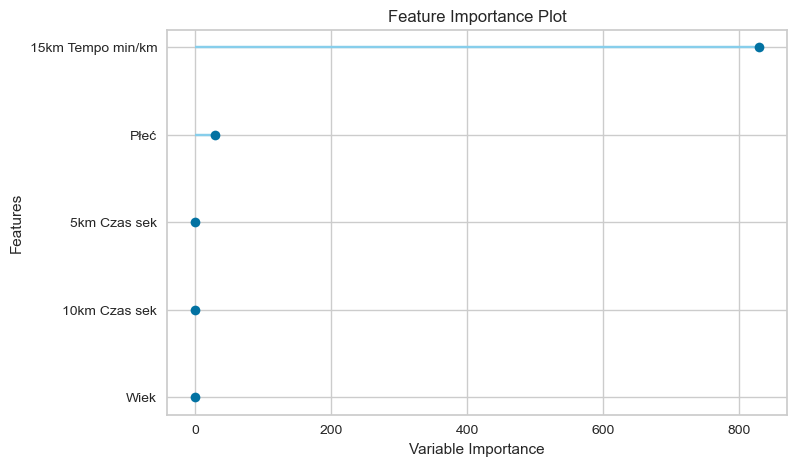

In [78]:
# istotność cech

plot_model(best_final_model, plot='feature')

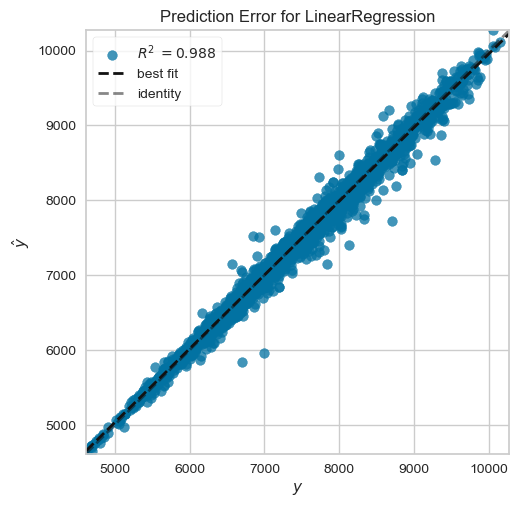

In [79]:
# widać, że model przewiduje niemalże doskonale

plot_model(best_final_model, plot='error')

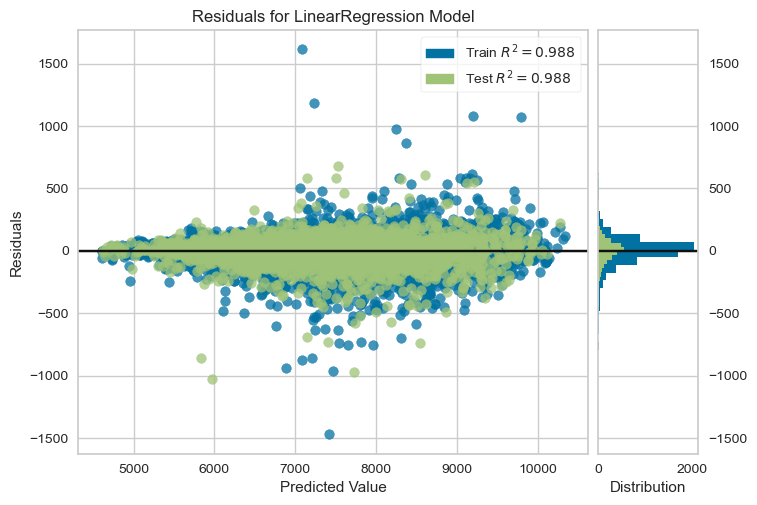

In [80]:
# widać, że model nie jest przeuczony - bardzo dobrze przewiduje dla danych testowych jak i treningowych

plot_model(best_final_model, plot='residuals')

In [81]:
# trenuję model na całym Dataset

final_model = finalize_model(best_final_model)

### Zapisywanie modelu (lokalnie + do DigitalOcean)

In [98]:
# zapisuję pipeline lokalnie

save_model(final_model, 'linear_regression_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['5km Czas [sek]',
                                              '10km Czas [sek]',
                                              '15km Tempo [min/km]', 'Wiek'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Płeć'],
                                     transformer=OrdinalEncoder(cols=['Płeć'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Płeć',
                                                                          'data_type': dtype('O'),
     

In [99]:
# zapisuję model do Digital Ocean Space

s3.upload_file(
    Filename='linear_regression_pipeline.pkl',
    Bucket=BUCKET_NAME,
    Key='stocks/models/linear_regression_pipeline.pkl'
)

In [100]:
user_data_df = pd.DataFrame(
        {'Wiek' : 28,
        'Płeć' : 'M',
        '5km Czas [sek]' : 1500, 
        '10km Czas [sek]' : 5000,
        '15km Tempo [min/km]' : 4.45,
        }, index=[0])

In [101]:
import datetime

prediction = predict_model(final_model, data=user_data_df)

prediction_seconds = round(prediction["prediction_label"][0], 2)

prediction_time = str(datetime.timedelta(seconds=int(prediction_seconds)))

print(f'Estymowany czas ukończenia półmaratonu w formacie: H:M:S wynosi {prediction_time}')

Estymowany czas ukończenia półmaratonu w formacie: H:M:S wynosi 1:59:25
